<a href="https://colab.research.google.com/github/AlexandraZavala/MarkAnomDetMod/blob/main/market_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Market Anomaly Detection

##Load Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("FinancialMarketData.csv")

In [ ]:
data.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,...,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,...,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,...,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,...,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,...,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,...,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,...,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [ ]:
data.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [ ]:
data.dtypes

,0
Y,int64
Data,object
XAU BGNL,float64
ECSURPUS,float64
BDIY,float64
CRY,float64
DXY,float64
JPY,float64
GBP,float64
Cl1,float64


##Data Analysis

In [ ]:
data.isnull().sum()

,0
Y,0
Data,0
XAU BGNL,0
ECSURPUS,0
BDIY,0
CRY,0
DXY,0
JPY,0
GBP,0
Cl1,0


In [ ]:
len(data)

1111

In [ ]:
data.nunique()

,0
Y,2
Data,1111
XAU BGNL,1092
ECSURPUS,747
BDIY,936
CRY,1095
DXY,1078
JPY,967
GBP,577
Cl1,1045


In [ ]:
threshold = 0.85

unique_percentages = data.nunique() / len(data)

criteria = unique_percentages > threshold

columns_to_filter = unique_percentages[criteria].keys()

columns_to_filter

Index(['Data', 'XAU BGNL', 'CRY', 'DXY', 'JPY', 'Cl1', 'USGG30YR', 'GT10',
       'GTDEM30Y', 'GTDEM10Y', 'GTITL30YR', 'GTITL10YR', 'GTITL2YR',
       'LUMSTRUU', 'LMBITR', 'LUACTRUU', 'LF98TRUU', 'LG30TRUU', 'LP01TREU',
       'EMUSTRUU', 'LF94TRUU', 'MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN',
       'MXCN'],
      dtype='object')

In [ ]:
columns_to_filter=columns_to_filter.drop(['Data'])

In [ ]:
data.shape

(1111, 44)

In [ ]:
data = data.drop(columns_to_filter, axis=1)

In [ ]:
data.shape

(1111, 17)

<Axes: >

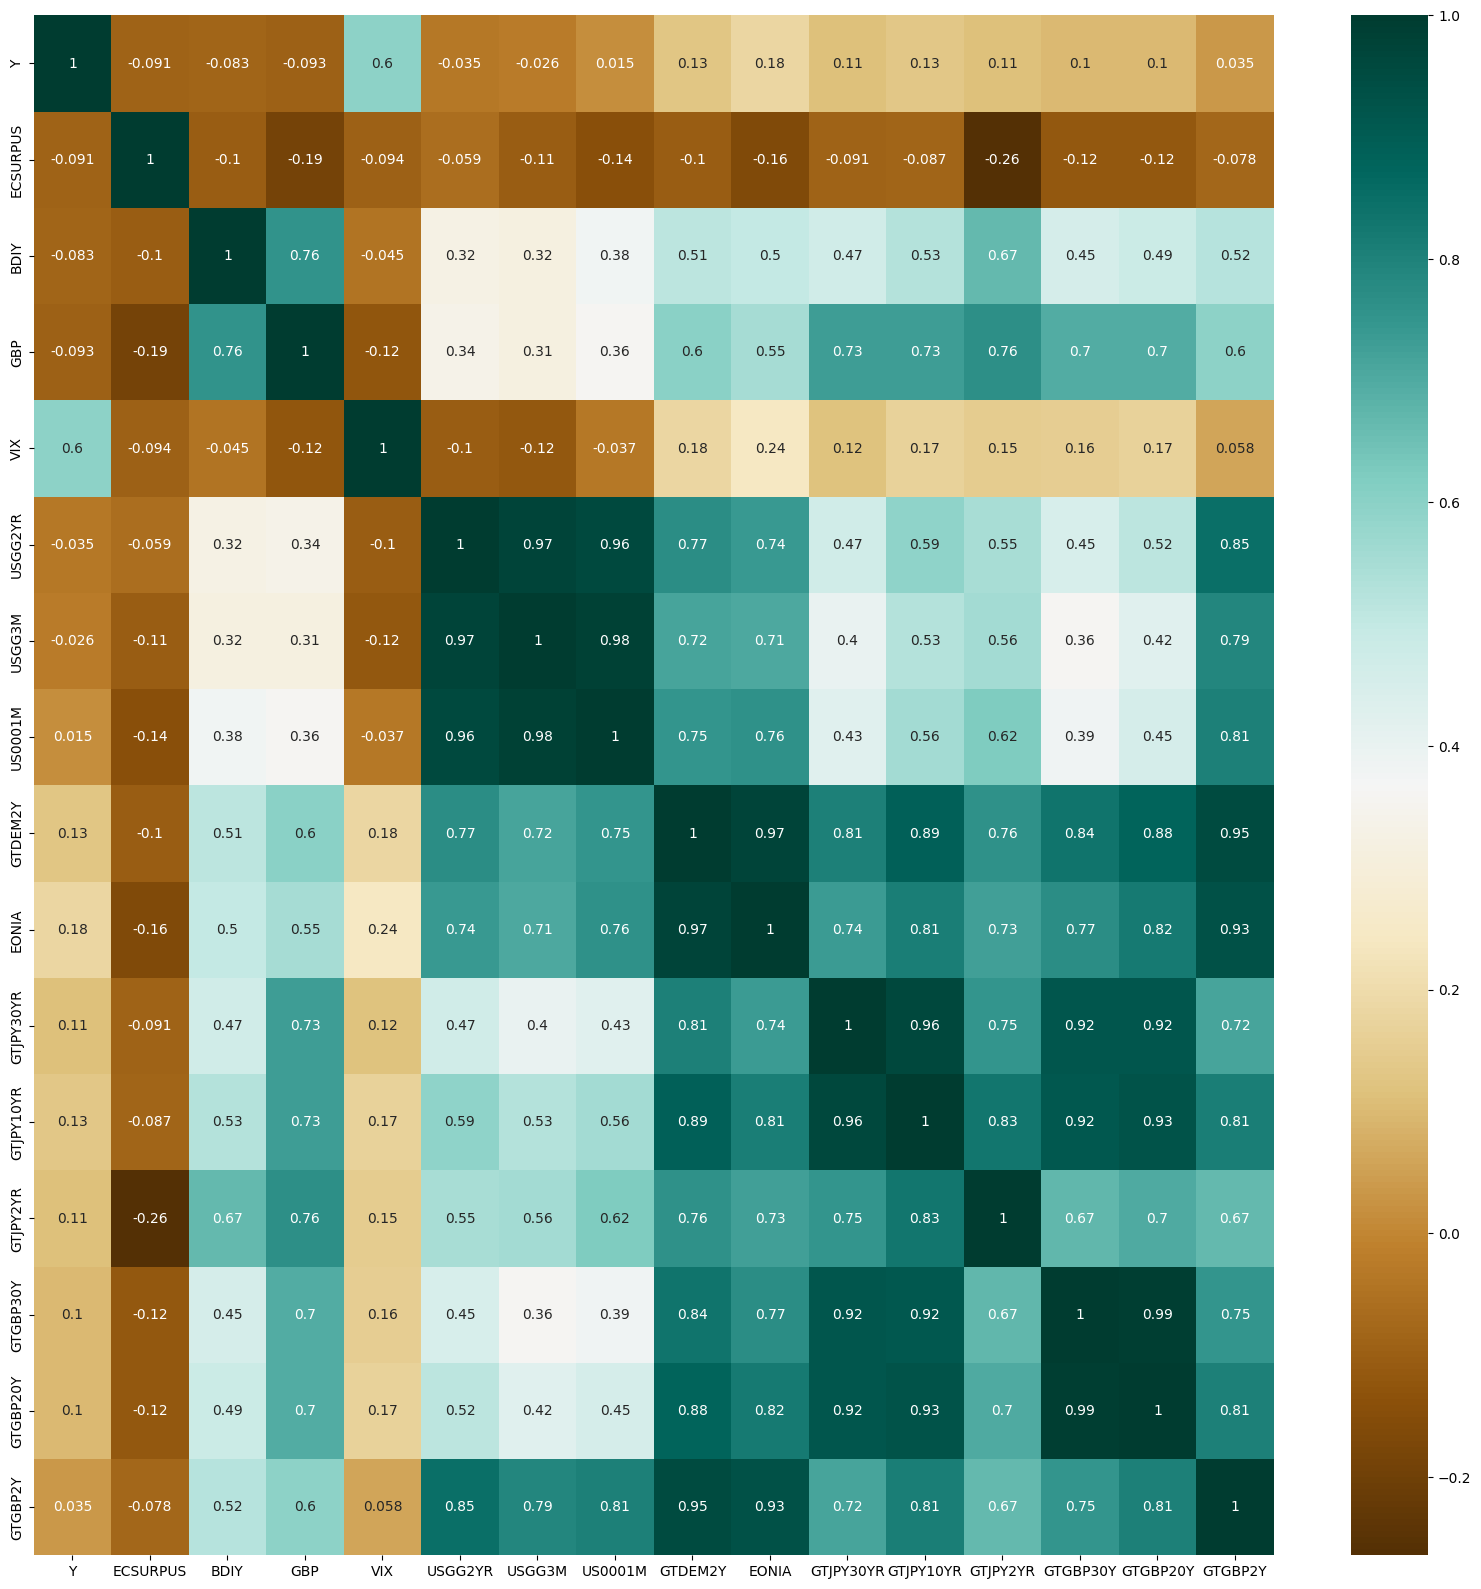

In [ ]:
plt.figure(figsize=(20,20))
data_without_data=data.drop('Data', axis=1)
data_without_data
c=data_without_data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [ ]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  print(f"{model.__class__.__name__} Accuracy: {accuracy}")
  print(f"\n Classification Report:\n {classification_report(y_test, predictions)}")
  print("==============")
  with open(filename, 'wb') as file:
    pickle.dump(model,file)
  print(f"Model saved as {filename}")

In [ ]:
y=data['Y']
y

,Y
0,0
1,0
2,0
3,0
4,1
...,...
1106,0
1107,0
1108,0
1109,0


In [ ]:
X= data.drop(['Data', 'Y'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
features = X.columns.tolist()
features

['ECSURPUS',
 'BDIY',
 'GBP',
 'VIX',
 'USGG2YR',
 'USGG3M',
 'US0001M',
 'GTDEM2Y',
 'EONIA',
 'GTJPY30YR',
 'GTJPY10YR',
 'GTJPY2YR',
 'GTGBP30Y',
 'GTGBP20Y',
 'GTGBP2Y']

In [ ]:
x = x_train.loc[:, features].values
x

array([[7.700e-02, 1.388e+03, 1.646e+00, ..., 4.535e+00, 4.770e+00,
        6.524e+00],
       [4.300e-02, 1.405e+03, 1.638e+00, ..., 4.746e+00, 4.975e+00,
        6.613e+00],
       [1.350e-01, 1.368e+03, 1.650e+00, ..., 4.691e+00, 4.900e+00,
        6.521e+00],
       ...,
       [3.610e-01, 9.610e+02, 1.227e+00, ..., 1.964e+00, 1.861e+00,
        6.000e-02],
       [3.400e-01, 9.530e+02, 1.226e+00, ..., 1.972e+00, 1.863e+00,
        1.300e-01],
       [4.430e-01, 9.260e+02, 1.216e+00, ..., 2.003e+00, 1.895e+00,
        1.940e-01]])

In [ ]:
x = StandardScaler().fit_transform(x_train)

In [ ]:
x_t = StandardScaler().fit_transform(x_test)

In [ ]:
x_train.shape


(888, 15)

In [ ]:
np.mean(x),np.std(x)


(6.187909710823695e-17, 1.0)

In [ ]:
np.mean(x_t),np.std(x_t)

(-3.6323709361727094e-16, 1.0)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [ ]:
normalised_data = pd.DataFrame(x,columns=feat_cols)

In [ ]:
normalised_data.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14
883,1.087496,-0.668880,-2.018220,-0.904196,-0.521746,-0.573237,-0.604798,-1.568202,-1.303689,-2.271559,-2.037680,-1.468272,-2.251594,-2.035871,-1.251985
884,1.231105,-0.732297,-2.193388,-1.054182,-0.493389,-0.585982,-0.581212,-1.590133,-1.307320,-2.540088,-2.060955,-1.496665,-2.304973,-2.086401,-1.279849
885,1.111431,-0.710698,-2.242654,-0.990409,-0.487390,-0.583433,-0.573029,-1.614372,-1.308530,-2.505808,-2.074532,-1.457625,-2.414159,-2.168900,-1.285044
886,1.048601,-0.714375,-2.248128,-0.888844,-0.494480,-0.596689,-0.567734,-1.584939,-1.292190,-2.435343,-2.109445,-1.468272,-2.404454,-2.166838,-1.251985
887,1.356763,-0.726782,-2.302868,-1.049458,-0.509749,-0.585982,-0.572067,-1.554929,-1.308530,-2.376304,-2.078412,-1.723806,-2.366845,-2.133838,-1.221760


In [ ]:
normalised_data_t = pd.DataFrame(x_t,columns=feat_cols)
normalised_data_t

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14
0,0.552128,-0.800534,-1.320191,-0.722223,-0.349856,-0.851450,-0.733498,-0.764827,0.881632,0.456867,0.392400,-1.482492,1.157672,1.020013,-0.668963
1,0.560794,-0.882510,-1.014288,-0.809862,-0.306013,-0.874944,-0.729883,-0.044395,0.900729,0.773405,0.417238,-1.634012,1.297927,1.160584,-0.665843
2,0.425026,-1.078339,-0.932714,-0.709077,-0.292860,-0.863197,-0.719040,-0.392991,0.900729,0.958961,0.864327,-1.006285,1.342453,1.201674,-0.793768
3,0.355697,-1.274169,-1.075469,-0.785761,-0.335607,-0.857323,-0.725064,-1.299341,0.958020,1.401022,1.112709,-1.222743,1.206650,1.045964,-0.937293
4,0.248816,-1.340204,-1.136649,-0.846013,-0.259977,-0.833829,-0.731088,-1.496879,0.881632,1.319159,1.025776,-1.330971,1.244497,1.078404,-0.849930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.338365,2.271258,1.494112,0.201269,-1.453384,-1.462887,-1.529446,-0.462710,-1.562788,-0.148920,0.827069,0.487272,-0.350858,-0.260265,-1.071146
219,0.234372,1.888707,1.410498,0.125681,-1.451960,-1.453959,-1.528096,-0.253553,-1.620080,-0.001566,0.926423,0.379043,-0.191456,-0.130508,-0.982223
220,0.630123,1.863659,1.620551,-0.037546,-1.440889,-1.447968,-1.525831,-0.346512,-1.581885,0.162160,1.212063,0.898542,-0.241993,-0.177220,-0.978167
221,0.708117,1.972959,1.447207,-0.198582,-1.438368,-1.453959,-1.523578,-0.358132,-1.620080,0.102127,1.125129,0.638793,-0.308782,-0.250534,-1.060226


In [ ]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=9)
principalComponents_data = pca_data.fit_transform(x)


In [ ]:
principalComponents_data_t = pca_data.fit_transform(x_t)

In [ ]:
principal_data_Df = pd.DataFrame(data = principalComponents_data
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4',
                          'principal component 5','principal component 6','principal component 7','principal component 8',
                          'principal component 9'])


In [ ]:
principal_data_Df.tail()


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
883,-5.120114,-1.801531,-0.687801,1.218941,-0.512491,1.231070,-0.651969,0.290036,-0.357894
884,-5.290848,-1.990042,-0.711482,1.391070,-0.594492,1.322166,-0.780013,0.163142,-0.418297
885,-5.339463,-2.041911,-0.763895,1.245234,-0.537483,1.346967,-0.804889,0.251446,-0.395463
886,-5.309282,-2.043778,-0.703836,1.148381,-0.543411,1.328582,-0.772718,0.304093,-0.363513
887,-5.331498,-2.053132,-0.586792,1.548173,-0.618448,1.306090,-0.773134,0.410416,-0.357553


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)

In [ ]:
iso_forest.fit(x)

IsolationForest(contamination=0.05, random_state=42)

In [ ]:
predictions = iso_forest.predict(x)

In [ ]:
predictions = (predictions == -1).astype(int)

In [ ]:
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)
f1 = f1_score(y_train, predictions)

print(f'Precisión: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')

Precisión: 0.16, Recall: 0.03, F1-Score: 0.06


In [ ]:
iso_forest.fit(principal_data_Df)

IsolationForest(contamination=0.05, random_state=42)

In [ ]:
predictions = iso_forest.predict(principal_data_Df)

In [ ]:
predictions = (predictions == -1).astype(int)

In [ ]:
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)
f1 = f1_score(y_train, predictions)

print(f'Precisión: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')

Precisión: 0.36, Recall: 0.08, F1-Score: 0.13


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
lr_model = LogisticRegression(random_state=42)
evaluate_and_save_model(lr_model, x, x_test, y_train, y_test,"lr_model.pkl")
evaluate_and_save_model(lr_model, principal_data_Df, principalComponents_data_t, y_train, y_test,"lr_model_pca.pkl")

LogisticRegression Accuracy: 0.874439461883408

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       194
           1       1.00      0.03      0.07        29

    accuracy                           0.87       223
   macro avg       0.94      0.52      0.50       223
weighted avg       0.89      0.87      0.82       223

Model saved as lr_model.pkl
LogisticRegression Accuracy: 0.7847533632286996

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       194
           1       0.31      0.55      0.40        29

    accuracy                           0.78       223
   macro avg       0.62      0.69      0.63       223
weighted avg       0.85      0.78      0.81       223

Model saved as lr_model_pca.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(x, y_train)

In [ ]:
X_resampled_pca, y_resampled_pca = smote.fit_resample(principal_data_Df, y_train)

In [ ]:
y_resampled

,Y
0,0
1,0
2,0
3,0
4,1
...,...
1355,1
1356,1
1357,1
1358,1


In [ ]:
evaluate_and_save_model(lr_model, X_resampled, x_test, y_resampled, y_test,"lr_model_smote.pkl")
evaluate_and_save_model(lr_model, X_resampled_pca, principalComponents_data_t, y_resampled_pca, y_test,"lr_model_smote.pkl")

LogisticRegression Accuracy: 0.13004484304932734

 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       194
           1       0.13      1.00      0.23        29

    accuracy                           0.13       223
   macro avg       0.07      0.50      0.12       223
weighted avg       0.02      0.13      0.03       223

Model saved as lr_model_smote.pkl
LogisticRegression Accuracy: 0.6636771300448431

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.67      0.78       194
           1       0.22      0.62      0.32        29

    accuracy                           0.66       223
   macro avg       0.57      0.65      0.55       223
weighted avg       0.83      0.66      0.72       223

Model saved as lr_model_smote.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sample

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
evaluate_and_save_model(rf_model, X_resampled_pca, principalComponents_data_t, y_resampled_pca, y_test,"rf_model_smote.pkl")
evaluate_and_save_model(rf_model, principal_data_Df, principalComponents_data_t, y_train, y_test,"rf_model.pkl")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier Accuracy: 0.7432432432432432

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       193
           1       0.00      0.00      0.00        29

    accuracy                           0.74       222
   macro avg       0.43      0.43      0.43       222
weighted avg       0.74      0.74      0.74       222

Model saved as rf_model_smote.pkl
RandomForestClassifier Accuracy: 0.7567567567567568

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       193
           1       0.00      0.00      0.00        29

    accuracy                           0.76       222
   macro avg       0.43      0.44      0.43       222
weighted avg       0.74      0.76      0.75       222

Model saved as rf_model.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
data

,Y,Data,ECSURPUS,BDIY,GBP,VIX,USGG2YR,USGG3M,US0001M,GTDEM2Y,EONIA,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y
0,0,1/11/2000,0.077,1388.0,1.6460,22.50,6.4280,5.4260,5.78100,4.316,2.890,2.422,1.709,0.346,4.5350,4.7700,6.5240
1,0,1/18/2000,0.043,1405.0,1.6380,21.50,6.4650,5.3780,5.80300,4.321,3.030,2.418,1.765,0.349,4.7460,4.9750,6.6130
2,0,1/25/2000,0.135,1368.0,1.6500,23.02,6.4320,5.5620,5.81900,4.270,3.150,2.259,1.625,0.293,4.6910,4.9000,6.5210
3,0,2/1/2000,0.191,1311.0,1.6110,23.45,6.5740,5.7080,5.88500,4.326,3.300,2.330,1.770,0.364,4.5930,4.7940,6.4670
4,1,2/8/2000,0.312,1277.0,1.6110,21.25,6.6780,5.6770,5.89100,4.390,3.260,2.481,1.919,0.359,4.5480,4.7680,6.4720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,0.339,2271.0,1.3760,20.30,0.1452,0.0025,0.10738,-0.716,-0.480,0.621,0.077,-0.140,1.2864,1.2610,0.0401
1107,0,3/30/2021,0.303,2103.0,1.3719,19.61,0.1465,0.0101,0.10850,-0.698,-0.483,0.648,0.085,-0.145,1.3580,1.3210,0.0686
1108,0,4/6/2021,0.440,2092.0,1.3822,18.12,0.1566,0.0152,0.11038,-0.706,-0.481,0.678,0.108,-0.121,1.3353,1.2994,0.0699
1109,0,4/13/2021,0.467,2140.0,1.3737,16.65,0.1589,0.0101,0.11225,-0.707,-0.483,0.667,0.101,-0.133,1.3053,1.2655,0.0436


In [ ]:
data['Data'] = pd.to_datetime(data['Data'])

In [ ]:
data

,Y,Data,ECSURPUS,BDIY,GBP,VIX,USGG2YR,USGG3M,US0001M,GTDEM2Y,EONIA,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y
0,0,2000-01-11,0.077,1388.0,1.6460,22.50,6.4280,5.4260,5.78100,4.316,2.890,2.422,1.709,0.346,4.5350,4.7700,6.5240
1,0,2000-01-18,0.043,1405.0,1.6380,21.50,6.4650,5.3780,5.80300,4.321,3.030,2.418,1.765,0.349,4.7460,4.9750,6.6130
2,0,2000-01-25,0.135,1368.0,1.6500,23.02,6.4320,5.5620,5.81900,4.270,3.150,2.259,1.625,0.293,4.6910,4.9000,6.5210
3,0,2000-02-01,0.191,1311.0,1.6110,23.45,6.5740,5.7080,5.88500,4.326,3.300,2.330,1.770,0.364,4.5930,4.7940,6.4670
4,1,2000-02-08,0.312,1277.0,1.6110,21.25,6.6780,5.6770,5.89100,4.390,3.260,2.481,1.919,0.359,4.5480,4.7680,6.4720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,2021-03-23,0.339,2271.0,1.3760,20.30,0.1452,0.0025,0.10738,-0.716,-0.480,0.621,0.077,-0.140,1.2864,1.2610,0.0401
1107,0,2021-03-30,0.303,2103.0,1.3719,19.61,0.1465,0.0101,0.10850,-0.698,-0.483,0.648,0.085,-0.145,1.3580,1.3210,0.0686
1108,0,2021-04-06,0.440,2092.0,1.3822,18.12,0.1566,0.0152,0.11038,-0.706,-0.481,0.678,0.108,-0.121,1.3353,1.2994,0.0699
1109,0,2021-04-13,0.467,2140.0,1.3737,16.65,0.1589,0.0101,0.11225,-0.707,-0.483,0.667,0.101,-0.133,1.3053,1.2655,0.0436


In [ ]:
data.set_index('Data', inplace=True)

#Using moving average

In [ ]:
data = pd.read_csv("FinancialMarketData.csv")

In [ ]:
data['VIX_MA'] = data['VIX'].rolling(4).mean()
data['DXY_MA'] = data['DXY'].rolling(4).mean()
data['CRY_MA'] = data['CRY'].rolling(4).mean()

In [ ]:
threshold = 0.8

unique_percentages = data.nunique() / len(data)

criteria = unique_percentages > threshold

columns_to_filter = unique_percentages[criteria].keys()

columns_to_filter

Index(['Data', 'XAU BGNL', 'BDIY', 'CRY', 'DXY', 'JPY', 'Cl1', 'USGG30YR',
       'GT10', 'USGG2YR', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'GTITL30YR',
       'GTITL10YR', 'GTITL2YR', 'GTGBP30Y', 'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU',
       'LMBITR', 'LUACTRUU', 'LF98TRUU', 'LG30TRUU', 'LP01TREU', 'EMUSTRUU',
       'LF94TRUU', 'MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN', 'MXCN',
       'VIX_MA', 'DXY_MA', 'CRY_MA'],
      dtype='object')

In [ ]:
columns_to_filter=columns_to_filter.drop(['Data','VIX_MA','CRY_MA','DXY_MA'])
data = data.drop(columns_to_filter, axis=1)

In [ ]:
data.shape

(1111, 14)

In [ ]:
data.dropna(inplace=True)

In [ ]:
y=data['Y']
X= data.drop(['Data', 'Y'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=0)

In [ ]:
features = X.columns.tolist()
features

['ECSURPUS',
 'GBP',
 'VIX',
 'USGG3M',
 'US0001M',
 'EONIA',
 'GTJPY30YR',
 'GTJPY10YR',
 'GTJPY2YR',
 'VIX_MA',
 'DXY_MA',
 'CRY_MA']

In [ ]:
x = x_train.loc[:, features].values
x

array([[1.9100000e-01, 1.6110000e+00, 2.3450000e+01, ..., 2.2617500e+01,
        1.0243750e+02, 1.6409000e+02],
       [3.1200000e-01, 1.6110000e+00, 2.1250000e+01, ..., 2.2305000e+01,
        1.0335250e+02, 1.6613250e+02],
       [3.9100000e-01, 1.5970000e+00, 2.2920000e+01, ..., 2.2660000e+01,
        1.0406000e+02, 1.6727500e+02],
       ...,
       [3.4000000e-01, 1.2260000e+00, 1.2850000e+01, ..., 1.2252500e+01,
        1.0264750e+02, 1.9173075e+02],
       [4.4300000e-01, 1.2160000e+00, 1.1490000e+01, ..., 1.1945000e+01,
        1.0288250e+02, 1.9115125e+02],
       [4.1300000e-01, 1.2380000e+00, 1.1870000e+01, ..., 1.2050000e+01,
        1.0214250e+02, 1.9229350e+02]])

In [ ]:
x = StandardScaler().fit_transform(x_train)
x_t = StandardScaler().fit_transform(x_test)

In [ ]:
x

array([[ 0.60122489, -0.13750713,  0.36434533, ...,  0.27263463,
         1.02601648, -1.5180831 ],
       [ 0.96256382, -0.13750713,  0.10494089, ...,  0.2345944 ,
         1.10014862, -1.48663095],
       [ 1.19847932, -0.21385279,  0.30185244, ...,  0.27780811,
         1.15746938, -1.46903776],
       ...,
       [ 1.04617944, -2.23701285, -0.88551243, ..., -0.98908394,
         1.04303042, -1.09244728],
       [ 1.35376548, -2.29154547, -1.04587154, ..., -1.02651553,
         1.06206982, -1.10137091],
       [ 1.26417731, -2.17157371, -1.00106532, ..., -1.01373401,
         1.00211595, -1.08378157]])

In [ ]:
x_t

array([[ 0.56240301, -1.02196472, -0.81224454, ..., -0.76873113,
         1.94805796,  0.84542661],
       [ 0.42684633, -0.94025245, -0.71156798, ..., -0.79364999,
         1.64685019,  0.87005937],
       [ 0.3576259 , -1.08324893, -0.78816971, ..., -0.79944508,
         1.50431001,  0.87312379],
       ...,
       [ 0.63162344,  1.61734169, -0.04075567, ...,  0.11617841,
        -0.98965447,  0.54912148],
       [ 0.70949642,  1.44370311, -0.20161931, ...,  0.02519557,
        -0.99071334,  0.4801002 ],
       [ 0.78160103,  1.88086377, -0.00354911, ..., -0.02811922,
        -1.08755921,  0.60139014]])

In [ ]:
np.mean(x),np.std(x)

(-1.1762182232296617e-16, 1.0)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [ ]:
normalised_data = pd.DataFrame(x,columns=feat_cols)
normalised_data.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11
881,1.228342,-2.182480,-1.050588,-0.581724,-0.576911,-1.301845,-2.526161,-2.051714,-1.490048,-0.993649,0.945605,-1.117062
882,1.108891,-2.231560,-0.986916,-0.579162,-0.568691,-1.303054,-2.492000,-2.065270,-1.451101,-1.021342,0.987938,-1.083285
883,1.046179,-2.237013,-0.885512,-0.592484,-0.563372,-1.286732,-2.421780,-2.100130,-1.461723,-0.989084,1.043030,-1.092447
884,1.353765,-2.291545,-1.045872,-0.581724,-0.567724,-1.303054,-2.362947,-2.069144,-1.716647,-1.026516,1.062070,-1.101371
885,1.264177,-2.171574,-1.001065,-0.574037,-0.565307,-1.300636,-2.391415,-2.098194,-1.624591,-1.013734,1.002116,-1.083782


In [ ]:
normalised_data_t = pd.DataFrame(x_t,columns=feat_cols)

In [ ]:
pca_data = PCA(n_components=9)
principalComponents_data = pca_data.fit_transform(x)

In [ ]:
principalComponents_data_t = pca_data.fit_transform(x_t)

In [ ]:
principal_data_Df = pd.DataFrame(data = principalComponents_data
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4',
                          'principal component 5','principal component 6','principal component 7','principal component 8',
                          'principal component 9'])

In [ ]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)

In [ ]:
iso_forest.fit(x)

IsolationForest(contamination=0.05, random_state=42)

In [ ]:
predictions = iso_forest.predict(x)

In [ ]:
predictions = (predictions == -1).astype(int)

In [ ]:
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)
f1 = f1_score(y_train, predictions)

print(f'Precisión: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')

Precisión: 0.60, Recall: 0.13, F1-Score: 0.21


In [ ]:
iso_forest.fit(principal_data_Df)

IsolationForest(contamination=0.05, random_state=42)

In [ ]:
predictions = iso_forest.predict(principal_data_Df)

In [ ]:
predictions = (predictions == -1).astype(int)

In [ ]:
precision = precision_score(y_train, predictions)
recall = recall_score(y_train, predictions)
f1 = f1_score(y_train, predictions)

print(f'Precisión: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')

Precisión: 0.51, Recall: 0.11, F1-Score: 0.18


In [ ]:
lr_model = LogisticRegression(random_state=42)
evaluate_and_save_model(lr_model, x, x_test, y_train, y_test,"lr_model.pkl")
evaluate_and_save_model(lr_model, principal_data_Df, principalComponents_data_t, y_train, y_test,"lr_model_pca.pkl")

LogisticRegression Accuracy: 0.13063063063063063

 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       193
           1       0.13      1.00      0.23        29

    accuracy                           0.13       222
   macro avg       0.07      0.50      0.12       222
weighted avg       0.02      0.13      0.03       222

Model saved as lr_model.pkl
LogisticRegression Accuracy: 0.6621621621621622

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       193
           1       0.04      0.07      0.05        29

    accuracy                           0.66       222
   macro avg       0.44      0.41      0.42       222
weighted avg       0.74      0.66      0.70       222

Model saved as lr_model_pca.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sample

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y_train)
X_resampled_pca, y_resampled_pca = smote.fit_resample(principal_data_Df, y_train)

In [ ]:
evaluate_and_save_model(lr_model, X_resampled, x_test, y_resampled, y_test,"lr_model_smote.pkl")
evaluate_and_save_model(lr_model, X_resampled_pca, principalComponents_data_t, y_resampled_pca, y_test,"lr_model_smote.pkl")

LogisticRegression Accuracy: 0.13063063063063063

 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       193
           1       0.13      1.00      0.23        29

    accuracy                           0.13       222
   macro avg       0.07      0.50      0.12       222
weighted avg       0.02      0.13      0.03       222

Model saved as lr_model_smote.pkl
LogisticRegression Accuracy: 0.49099099099099097

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.50      0.63       193
           1       0.11      0.41      0.18        29

    accuracy                           0.49       222
   macro avg       0.48      0.46      0.40       222
weighted avg       0.75      0.49      0.57       222

Model saved as lr_model_smote.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sample